### APPROACH 1: Kaplan-Meier and Log-Rank Test

#### Step 1: Data Preparation

In [1]:
import pandas as pd
df_tcga_rna_seq_clinical = pd.read_csv('../PCA_Clustering_df.csv')

<ipython-input-1-bb2b43718ef7>:2: DtypeWarning: Columns (18,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tcga_rna_seq_clinical = pd.read_csv('../PCA_Clustering_df.csv')


In [2]:
df_cluster_0 = df_tcga_rna_seq_clinical[df_tcga_rna_seq_clinical['Cluster'] == 0]
df_cluster_1 = df_tcga_rna_seq_clinical[df_tcga_rna_seq_clinical['Cluster'] == 1]
df_cluster_2 = df_tcga_rna_seq_clinical[df_tcga_rna_seq_clinical['Cluster'] == 2]
df_cluster_3 = df_tcga_rna_seq_clinical[df_tcga_rna_seq_clinical['Cluster'] == 3]

In [3]:
df_cluster_0.shape

(288, 60749)

In [4]:
df_cluster_1.shape

(155, 60749)

In [5]:
df_cluster_2.shape

(224, 60749)

In [6]:
df_cluster_3.shape

(426, 60749)

In [7]:
df_cluster_3['event_time'] = df_cluster_3.apply(
    lambda row: row['days_to_last_follow_up'] if row['vital_status'] == 'Alive' else row['days_to_death'],
    axis=1
)
df_cluster_3['event_observed'] = df_cluster_3['vital_status'].apply(lambda x: 0 if x == 'Dead' else 1)

<ipython-input-7-72fe901233fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_3['event_time'] = df_cluster_3.apply(
<ipython-input-7-72fe901233fd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_3['event_observed'] = df_cluster_3['vital_status'].apply(lambda x: 0 if x == 'Dead' else 1)


#### Step 2: Categorizing BCL9 Expression

In [8]:
Q1 = df_cluster_3['ENSG00000116128.11'].quantile(0.25)
Q3 = df_cluster_3['ENSG00000116128.11'].quantile(0.75)

# Classify patients based on BCL9 expression levels
df_cluster_3['BCL9_Group'] = 'Intermediate'  # Default to Intermediate
df_cluster_3.loc[df_cluster_3['ENSG00000116128.11'] <= Q1, 'BCL9_Group'] = 'Low'
df_cluster_3.loc[df_cluster_3['ENSG00000116128.11'] >= Q3, 'BCL9_Group'] = 'High'

<ipython-input-8-df532ae63cd7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_3['BCL9_Group'] = 'Intermediate'  # Default to Intermediate


In [9]:
df_cluster_3.head()

,Unnamed: 0.1,Unnamed: 0,_id_x,patientID,barcode,patient,sample,shortLetterCode,definition,sample_submitter_id,...,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,Cluster,event_time,event_observed,BCL9_Group
0,0,0,65325f1f961444e8e0ce4aa9,A1L7,TCGA-E2-A1L7-01A-11R-A144-07,TCGA-E2-A1L7,TCGA-E2-A1L7-01A,TP,Tissue,TCGA-E2-A1L7-01A,...,-5.199338,-5.199338,-0.884593,-5.199338,0.007527,-1.442543,3,1836.0,1,Low
3,3,3,65325f1f961444e8e0ce4aac,A0D4,TCGA-A2-A0D4-01A-11R-A00Z-07,TCGA-A2-A0D4,TCGA-A2-A0D4-01A,TP,Primary_Solid_Tumor,TCGA-A2-A0D4-01A,...,-5.199338,-5.199338,0.939094,-5.199338,0.007527,0.995858,3,767.0,1,Intermediate
4,4,4,65325f20961444e8e0ce4aad,A1R4,TCGA-E9-A1R4-01A-21R-A14D-07,TCGA-E9-A1R4,TCGA-E9-A1R4-01A,TP,Primary_Solid_Tumor,TCGA-E9-A1R4-01A,...,-5.199338,-5.199338,-1.239352,-5.199338,-1.700222,1.157061,3,186.0,1,Low
5,5,5,65325f20961444e8e0ce4aae,A1KQ,TCGA-AO-A1KQ-01A-11R-A13Q-07,TCGA-AO-A1KQ,TCGA-AO-A1KQ-01A,TP,Primary_Solid_Tumor,TCGA-AO-A1KQ-01A,...,1.471555,-5.199338,-0.731515,-5.199338,-0.434861,0.027604,3,1882.0,1,Low
8,8,8,65325f20961444e8e0ce4ab1,A0SV,TCGA-A2-A0SV-01A-11R-A084-07,TCGA-A2-A0SV,TCGA-A2-A0SV-01A,TP,Primary_Solid_Tumor,TCGA-A2-A0SV-01A,...,-5.199338,-5.199338,1.488875,-5.199338,0.786745,0.605955,3,825.0,0,Intermediate


In [10]:
df_cluster_3_bcl9_high = df_cluster_3[df_cluster_3['BCL9_Group'] == 'High']
df_cluster_3_bcl9_low = df_cluster_3[df_cluster_3['BCL9_Group'] == 'Low']

#### Step 3: Kaplan-Meier Survival Estimates

In [11]:
df_cluster_3_bcl9_low = df_cluster_3_bcl9_low.dropna(subset=['event_time'])

In [12]:
from lifelines import KaplanMeierFitter

# Create Kaplan-Meier objects
kmf_high = KaplanMeierFitter()
kmf_low = KaplanMeierFitter()

# Fit data
kmf_high.fit(durations=df_cluster_3_bcl9_high['event_time'], event_observed=df_cluster_3_bcl9_high['event_observed'])
kmf_low.fit(durations=df_cluster_3_bcl9_low['event_time'], event_observed=df_cluster_3_bcl9_low['event_observed'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 107 total observations, 14 right-censored observations>

#### Step 4: Plotting Kaplan-Meier Curves

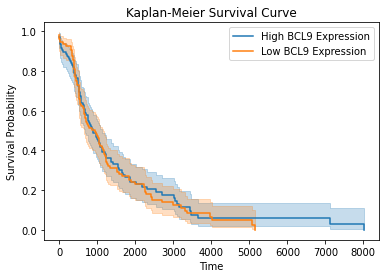

In [13]:
import matplotlib.pyplot as plt

kmf_high.plot(label='High BCL9 Expression')
kmf_low.plot(label='Low BCL9 Expression')

plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()

plt.show()

In [14]:
median_survival_high = kmf_high.median_survival_time_
median_survival_low = kmf_low.median_survival_time_
print(f"Median Survival Time - High BCL9 Expression: {median_survival_high}")
print(f"Median Survival Time - Low BCL9 Expression: {median_survival_low}")

Median Survival Time - High BCL9 Expression: 878.0
Median Survival Time - Low BCL9 Expression: 952.0


#### Step 5: Log-Rank Test

In [15]:
from lifelines.statistics import logrank_test

results = logrank_test(durations_A=df_cluster_3_bcl9_high['event_time'], durations_B=df_cluster_3_bcl9_low['event_time'],
                       event_observed_A=df_cluster_3_bcl9_high['event_observed'], event_observed_B=df_cluster_3_bcl9_low['event_observed'])
print(results.summary)

   test_statistic         p  -log2(p)
0        0.127491  0.721048  0.471833


### Approach 2: COX-PH Analysis

#### Step 1: Data Preparation

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_cluster_3['gender'] = label_encoder.fit_transform(df_cluster_3['gender'])
df_cluster_3['paper_pathologic_stage'] = label_encoder.fit_transform(df_cluster_3['paper_pathologic_stage'])


<ipython-input-16-5c47b7c9bdef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_3['gender'] = label_encoder.fit_transform(df_cluster_3['gender'])
<ipython-input-16-5c47b7c9bdef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_3['paper_pathologic_stage'] = label_encoder.fit_transform(df_cluster_3['paper_pathologic_stage'])


In [17]:

covariates = ['gender', 'paper_pathologic_stage', 'age_at_diagnosis']

df = df_cluster_3[covariates + ['event_time', 'event_observed', 'ENSG00000116128.11']]

In [18]:
# Check for missing values in each column
print(df.isnull().sum())

gender                    0
paper_pathologic_stage    0
age_at_diagnosis          6
event_time                0
event_observed            0
ENSG00000116128.11        0
dtype: int64


In [19]:
# Drop rows with any missing values across specified columns
df = df.dropna(subset=covariates + ['event_time', 'event_observed', 'ENSG00000116128.11'])

#### Step 2: Model Building

In [21]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()


cph.fit(df, duration_col='event_time', event_col='event_observed', 
        formula='ENSG00000116128.11 + gender + paper_pathologic_stage + age_at_diagnosis')

print("Cox Proportional Hazards Model Summary:")
cph.print_summary()


Cox Proportional Hazards Model Summary:


<lifelines.CoxPHFitter: fitted with 325 total observations, 44 right-censored observations>
             duration col = 'event_time'
                event col = 'event_observed'
      baseline estimation = breslow
   number of observations = 325
number of events observed = 281
   partial log-likelihood = -1355.47
         time fit was run = 2024-05-05 19:51:59 UTC

---
                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                      
ENSG00000116128.11      -0.02       0.98       0.08            -0.18             0.13                 0.84                 1.14
gender                   0.23       1.26       0.56            -0.87             1.33                 0.42                 3.77
paper_pathologic_stage  -0.00       1.00       0.07            -0.14             0.13                 0.87                 1.14
age_at_diagnosis         0.00       1.00       0.00             0.00             0.00                 1.00                 1.00

                         cmp to     z    p   -log2(p)
covariate                                            
ENSG00000116128.11         0.00 -0.31 0.76       0.40
gender                     0.00  0.41 0.68       0.55
paper_pathologic_stage     0.00 -0.06 0.95       0.07
age_at_diagnosis           0.00  2.70 0.01       7.19
---
Concordance = 0.56
Partial AIC = 2718.94
log-likelihood ratio test = 8.52 on 4 df
-log2(p) of ll-ratio test = 3.75

<Axes: xlabel='log(HR) (95% CI)'>

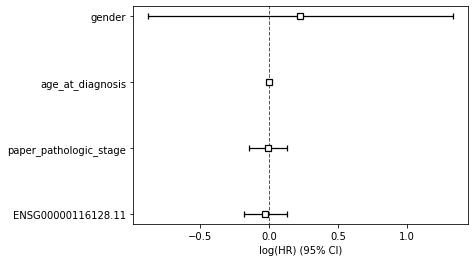

In [22]:
cph.plot()